In [1]:
import pylab
import imageio
import numpy as np
import matplotlib.pyplot as plt
from hopls import *
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

Using numpy backend.


In [2]:
def MyCNN(img, k=20):
    res = np.zeros((img.shape[0] // k, img.shape[1] // k))
    for i in range(img.shape[0] // k):
        for j in range(img.shape[1] // k):
            res[i, j] = np.mean(img[k * i: k * (i + 1), k * j: k * (j + 1)])
    return res

In [3]:
def get_data(path, k=20):
    video = imageio.get_reader(path + '.avi', 'ffmpeg')
    h, w, c = (video.get_data(0)).shape
    X = np.zeros((video.count_frames(), h // k, w // k))
    
    for frame in tqdm(range(video.count_frames())):
        X[frame] = MyCNN(video.get_data(frame) / 255., k)
        
    Y = np.loadtxt(path + '.txt')
    
    return X, Y

In [4]:
paths = []
with open("LPW/videos.txt") as f:
    for line in f:
        folder, video = line.split()
        paths.append(f"LPW/{folder}/{video}")

Посмотрим как выглядят данные

In [5]:
X, Y = get_data(paths[0])

100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:21<00:00, 91.08it/s]


Картинки выглядят так:

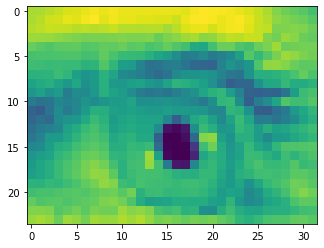

In [6]:
pylab.imshow(X[0])

Траекторию зрачка можно нарисовать так:

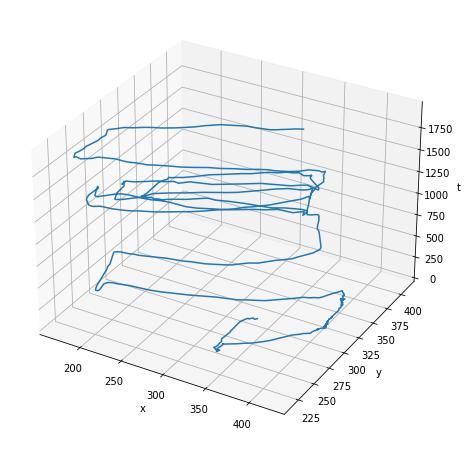

In [7]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(Y[:, 0], Y[:, 1], range(Y.shape[0]))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('t')
plt.show()

In [8]:
paths_train, paths_test = train_test_split(paths)

In [9]:
len(paths_train), len(paths_test)

(49, 17)

In [10]:
X_train, Y_train = None, None
for path in paths_train:
    X, Y = get_data(path)
    if X_train is None:
        X_train = X
        Y_train = Y
    else:
        X_train = np.vstack((X_train, X))
        Y_train = np.vstack((Y_train, Y))

100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:21<00:00, 92.22it/s]


In [11]:
X_test, Y_test = None, None
for path in paths_test:
    X, Y = get_data(path)
    if X_test is None:
        X_test = X
        Y_test = Y
    else:
        X_test = np.vstack((X_test, X))
        Y_test = np.vstack((Y_test, Y))

100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:22<00:00, 88.95it/s]


In [12]:
X_train.shape, X_test.shape

((96856, 24, 32), (34000, 24, 32))

In [13]:
scaler = StandardScaler()
scaler.fit(Y_train)
Y_train = scaler.transform(Y_train)
Y_test = scaler.transform(Y_test)

In [32]:
hopls = HOPLS(70, [6, 1], [6, 1])

In [33]:
hopls.fit(X_train, Y_train)

In [34]:
_, best_r_train, Q2_list_train = hopls.predict(X_train, Y_train)

In [35]:
_, best_r_test, Q2_list_test = hopls.predict(X_test, Y_test)

In [36]:
best_r_train, best_r_test

(54, 45)

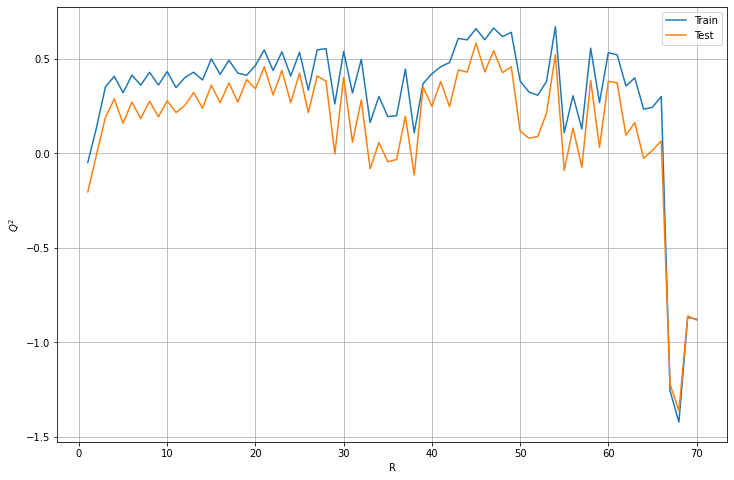

In [37]:
plt.figure(figsize=(12, 8))
plt.grid()
plt.plot(range(1, len(Q2_list_train) + 1), Q2_list_train, label="Train")
plt.plot(range(1, len(Q2_list_test) + 1), Q2_list_test, label="Test")
plt.legend()
plt.xlabel("R")
plt.ylabel("$Q^2$")
plt.show()